# Stability-Regions of ODE-Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator

# use LaTeX-mode
plt.rc('text', usetex=True)

## Stability Functions

In [2]:
# explicit methods
def euler_func(u):
    return abs(1+u)-1
def stabilized_euler_func(u):
    return abs(1+1/8*u**2+u)-1
def heun_func(u):
    return abs(1/2*u**2+u+1)-1
def order4_func(u):
    return abs(1/24*u**4+1/6*u**3+1/2*u**2+u+1)-1
def order6_func(u):
    return abs(1+u+182/375*u**2+673/4500*u**3+203/5400*u**4+1/120*u**5+1/720*u**6-1/2160*u**7)-1
# implicit methods
def back_euler_func(u):
    return abs(1+u/(1-u))-1
# imex
def imex_func(u, alpha, h=1):
    return abs(1+u/(1+alpha))-1
# symplectic methods
def sym_euler(u):
    # also störmer-verlet
    return 2-u**2
def sym_third_order(u):
    return 2- u**2 + u**4/12 -7*u**6/1728
def sym_third_order_stab(u):
    return (274031556999544225907228906242790432311055225603*u**4)/3288378683994531565958290873611636794225848221696 - (486777830487640155046389817065617*u**2)/486777830487640090174734030864384 + 2
def sym_order_four(u):
    return (138314130663427714961860427481843883177540342267563011335105275392460653423875218902808893457825*u**6)/1067993517960455041197510853084776057301352261178326384973520803911109862890320275011481043468288 + (121791803110908597479386555562833774419475961425*u**4)/1461501637330902918203684832716283019655932542976 - u**2 + 2

## Explicit Methods

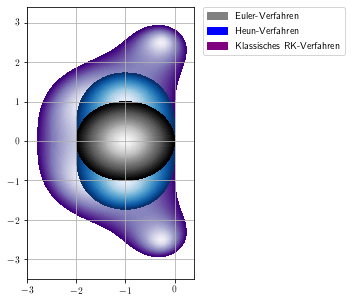

In [3]:
fig = plt.figure(figsize=(3,5))
# create parameters and meshgrid
nx = np.arange(-3, 0.5, 0.1)
ny = np.arange(-3.5, 3.5, 0.1)
x, y = np.meshgrid(nx, ny, sparse=True)

# create complex number
u = x+1j*y

# call stability function
R = euler_func(u)
R_2 = heun_func(u)
R_3 = order4_func(u)

# create contour plot
levels_3 = MaxNLocator(nbins=50).tick_values(R_3.min(), 0)
plt.contourf(nx,ny,R_3, levels=levels_3, cmap=plt.get_cmap('Purples'))

levels_2 = MaxNLocator(nbins=50).tick_values(R_2.min(), 0)
plt.contourf(nx,ny,R_2, levels=levels_2, cmap=plt.get_cmap('Blues'))

levels = MaxNLocator(nbins=50).tick_values(R.min(), 0)
plt.contourf(nx,ny,R, levels=levels, cmap=plt.get_cmap('Greys'))


euler = Patch(color='grey', label='Euler-Verfahren')
heun = Patch(color='blue', label='Heun-Verfahren')
rk4 = Patch(color='purple', label='Klassisches RK-Verfahren')
plt.legend(handles=[euler, heun, rk4], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True, which='both')
plt.plot()
plt.show()
#plt.savefig('Stability Regions.png')

## Implicit Method

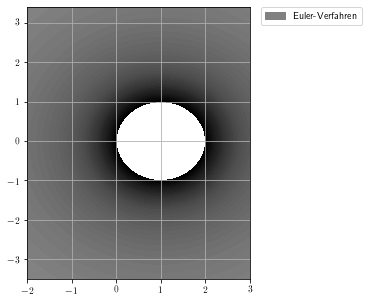

In [4]:
fig = plt.figure(figsize=(4,5))
# create parameters and meshgrid
nx = np.arange(-2, 3.1, 0.1)
ny = np.arange(-3.5, 3.5, 0.1)
x, y = np.meshgrid(nx, ny, sparse=True)

# create complex number
u = x+1j*y

# call stability function
R = back_euler_func(u)

# create contour plot
levels = MaxNLocator(nbins=100).tick_values(R.min()-1, 0)
plt.contourf(nx,ny,R, levels=levels, cmap=plt.get_cmap('Greys'))
euler = Patch(color='grey', label='Euler-Verfahren')
plt.legend(handles=[euler], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both')
plt.plot()
plt.show()
#plt.savefig('Back-Euler Stability.png')

## IMEX-Method

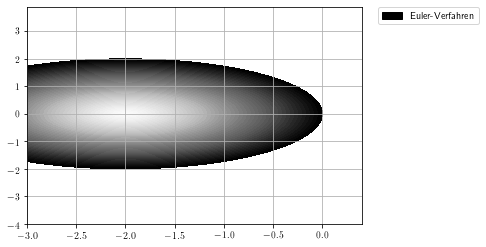

In [5]:
# create parameters and meshgrid
nx = np.arange(-3, 0.5, 0.1)
ny = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(nx, ny, sparse=True)

# create complex number
u = x+1j*y

# call stability function
R = imex_func(u, alpha=1)

# create contour plot
levels = MaxNLocator(nbins=50).tick_values(R.min(), 0)
plt.contourf(nx,ny,R, levels=levels, cmap=plt.get_cmap('Greys'))
euler = Patch(color='black', label='Euler-Verfahren')
plt.legend(handles=[euler], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both')
plt.plot()
plt.show()

## Stabilized Method

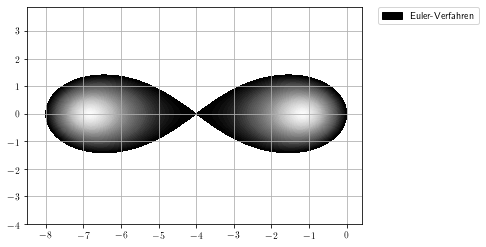

In [10]:
# create parameters and meshgrid
nx = np.arange(-8.5, 0.5, 0.1)
ny = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(nx, ny, sparse=True)

# create complex number
u = x+1j*y

# call stability function
R = stabilized_euler_func(u)

# create contour plot
levels = MaxNLocator(nbins=50).tick_values(R.min(), 0)
plt.contourf(nx,ny,R, levels=levels, cmap=plt.get_cmap('Greys'))
euler = Patch(color='black', label='Euler-Verfahren')
plt.legend(handles=[euler], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both')
plt.plot()
plt.show()

## PRK-Methdos

In [6]:
def create_sym_plots(R):
    M = []
    M_ = []
    for x in R:
        if abs(x) <= 2:
            M.append(x)
            M_.append(None)
        else:
            M.append(None)
            M_.append(x)
    plt.plot(u, M, color='black', label='stabil')
    plt.plot(u, M_, color='black', linestyle='dashed', label='instabil')
    plt.legend()
    plt.xlabel('w')
    plt.ylabel('spur$(M)$')
    plt.ylim(-4, 4)
    plt.xlim(-4, 4)
    plt.show()
    return

Hamiltonian Order 1


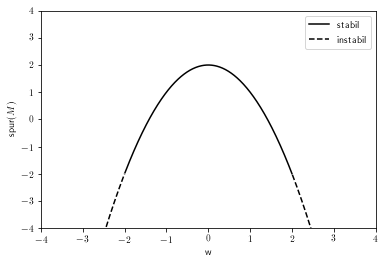

Hamiltonian Order 2


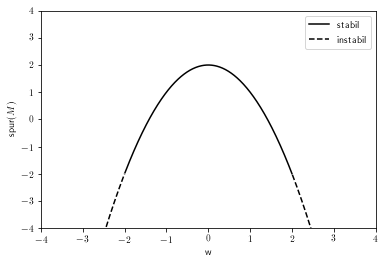

Hamiltonian Order 3


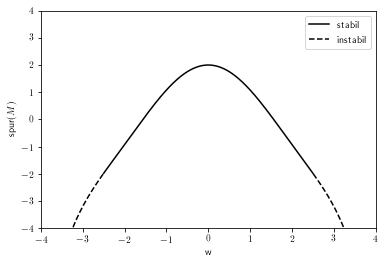

Hamiltonian Order 3 Stabilized


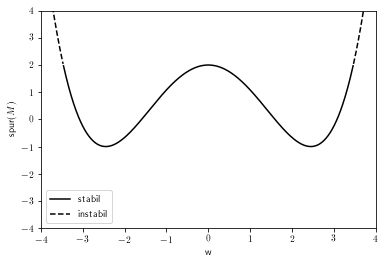

Hamiltonian Order 4


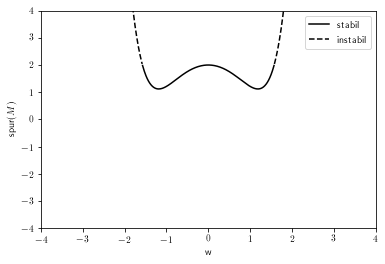

In [7]:
u = np.arange(-4, 4, 0.01)

print('Hamiltonian Order 1')
R = sym_euler(u)
create_sym_plots(R)

print('Hamiltonian Order 2')
R = sym_euler(u)
create_sym_plots(R)

print('Hamiltonian Order 3')
R = sym_third_order(u)
create_sym_plots(R)

print('Hamiltonian Order 3 Stabilized')
R = sym_third_order_stab(u)
create_sym_plots(R)

print('Hamiltonian Order 4')
R = sym_order_four(u)
create_sym_plots(R)